# Visualizing reward evolution for lunar landing training

### Author: Suhas Gupta
### MIDS W251 HW11

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [57]:
# List of output directories from the training and prediction runs
output_dirs = ['outputs_base_model',
               'outputs_nn_4layer-new_lr-1em5-adam',
               'outputs_nn_4layer-tanh-SGD',
               'outputs_nn_4layer_lr-default_adam']


## Reward chart during training

DescribeResult(nobs=50001, minmax=(-192.64905062402514, 354.14248401527396), mean=-1.6906495076930776, variance=252.22533247882396, skewness=-0.9345940198358951, kurtosis=70.90344860891337)
DescribeResult(nobs=50001, minmax=(-286.34061208578754, 337.2138128678004), mean=-5.973035792592595, variance=267.6697948779892, skewness=-0.4995161817913447, kurtosis=60.985490609634766)
DescribeResult(nobs=50001, minmax=(-212.58910801675597, 314.5829820062214), mean=-2.9529027786338586, variance=255.60965873182957, skewness=-1.3646179006046715, kurtosis=67.55537134715705)
DescribeResult(nobs=50001, minmax=(-150.0, 324.37263780966055), mean=-0.8491564991127294, variance=192.87726798997755, skewness=-0.19115344825032105, kurtosis=95.88656348355924)


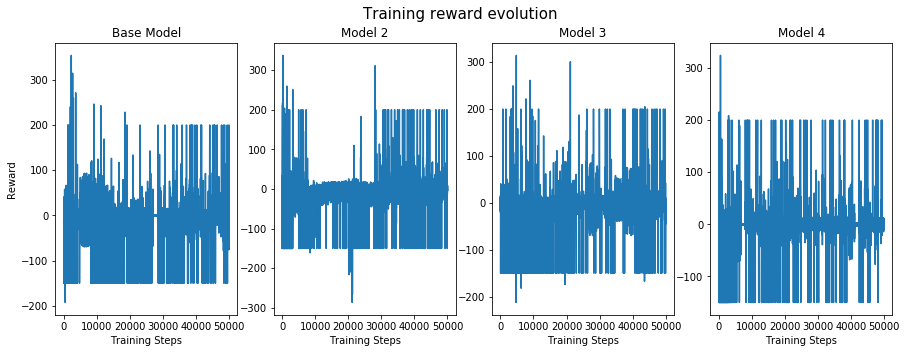

In [67]:
steps=[]
train_rewards=[]
fig, ax = plt.subplots(1,4)
fig.set_figheight(5)
fig.set_figwidth(15)

for i,output_dir in enumerate(output_dirs):
    training_rewards=np.loadtxt(output_dir+"/training_rewards.txt")
    step_num = [x[0] for x in training_rewards]
    rewards = [x[1] for x in training_rewards]
    print(stats.describe(rewards))
    steps.append(step_num)
    train_rewards.append(rewards)
    ax[i].plot(step_num,rewards)
    
ax[0].set_title("Base Model")
ax[1].set_title("Model 2")
ax[2].set_title("Model 3")
ax[3].set_title("Model 4")

fig.suptitle('Training reward evolution',size=15)
ax[0].set(ylabel='Reward')
for i in range(4):
    ax[i].set(xlabel='Training Steps')

## Reward chart during prediction

DescribeResult(nobs=5001, minmax=(-32.25135803222656, 57.767677307128906), mean=0.8163248006164301, variance=39.32135997461645, skewness=3.3247396193253023, kurtosis=20.18928984993074)
DescribeResult(nobs=5001, minmax=(-16.189817428588867, 5.510351657867432), mean=0.30432702240717935, variance=4.148165384634656, skewness=-0.8131134468380496, kurtosis=6.5875042783951745)
DescribeResult(nobs=5001, minmax=(-44.937477111816406, 3.4059414863586426), mean=0.44086123480603256, variance=7.3518881846096065, skewness=-5.343908724935918, kurtosis=69.00897261267143)
DescribeResult(nobs=5001, minmax=(-20.47087860107422, 64.91983032226562), mean=1.019566073390966, variance=27.285180817265413, skewness=8.42253847681191, kurtosis=86.4594775991331)


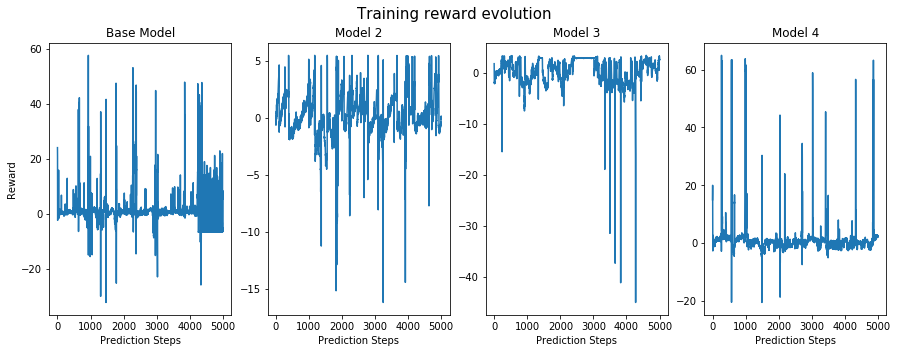

In [68]:
steps=[]
train_rewards=[]
fig, ax = plt.subplots(1,4)
fig.set_figheight(5)
fig.set_figwidth(15)

for i,output_dir in enumerate(output_dirs):
    training_rewards=np.loadtxt(output_dir+"/pred_rewards.txt")
    step_num = [x[0] for x in training_rewards]
    rewards = [x[1] for x in training_rewards]
    print(stats.describe(rewards))
    steps.append(step_num)
    train_rewards.append(rewards)
    ax[i].plot(step_num,rewards)

ax[0].set_title("Base Model")
ax[1].set_title("Model 2")
ax[2].set_title("Model 3")
ax[3].set_title("Model 4")

fig.suptitle('Training reward evolution',size=15)
ax[0].set(ylabel='Reward')
for i in range(4):
    ax[i].set(xlabel='Prediction Steps')


## Landing performance comparison

In [78]:
model1_success = !grep "Total successes are" outputs_base_model/output_log | tail -1 | awk '{print $NF}'
model2_success = !grep "Total successes are" outputs_nn_4layer-new_lr-1em5-adam/output_log | tail -1 | awk '{print $NF}'
model3_success = !grep "Total successes are" outputs_nn_4layer-tanh-SGD/output_log | tail -1 | awk '{print $NF}'
model4_success = !grep "Total successes are" outputs_nn_4layer_lr-default_adam/output_log | tail -1 | awk '{print $NF}'
print("Total successfull landings for each model are: ", model1_success,model2_success,model3_success,model4_success )

Total successfull landings for each model are:  ['32'] ['37'] ['33'] ['48']


## Training and Prediction Run Times

In [49]:
!egrep "Training Time" outputs*/output_log

outputs_base_model/output_log:--I--Training Time=2720.52 seconds
outputs_nn_4layer-new_lr-1em5-adam/output_log:--I--Training Time=2615.07 seconds
outputs_nn_4layer-tanh-SGD/output_log:--I--Training Time=2504.46 seconds
outputs_nn_4layer_lr-default_adam/output_log:--I--Training Time=2885.40 seconds


In [50]:
!egrep "Prediction Time" outputs*/output_log

outputs_base_model/output_log:--I--Prediction Time=135.55 seconds
outputs_nn_4layer-new_lr-1em5-adam/output_log:--I--Prediction Time=135.29 seconds
outputs_nn_4layer-tanh-SGD/output_log:--I--Prediction Time=157.33 seconds
outputs_nn_4layer_lr-default_adam/output_log:--I--Prediction Time=152.30 seconds


In [51]:
train_times = !egrep "Training Time" outputs*/output_log  | awk 'BEGIN {FS="="};{print $(NF)}' | awk '{print $1}'
pred_times = !egrep "Prediction Time" outputs*/output_log  | awk 'BEGIN {FS="="};{print $(NF)}' | awk '{print $1}'

In [55]:
times = [float(x) for x in pred_times]
times

[135.55, 135.29, 157.33, 152.3]

In [53]:
times = [float(x) for x in train_times]
times

[2720.52, 2615.07, 2504.46, 2885.4]